# Notebook for MRR processing

By: Claudio Duran-Alarcon - PhD student, IGE

Directors: Brice Boudevillain, Alexis Berne

Project: ANR-APRES3

## Importing libraries

In [3]:
import sys, os
sys.path.append("lib/IMProToo-master/IMProToo/") # adding IMProToo path
sys.path.append("lib/") # adding lib path
import core as IMProToo
import numpy as np
from MRR_functions import check_RawFiles as crf 
from MRR_functions import MRRQlooks
from MRR_functions import raw2snow
from MRR_functions import Time_integ
from MRR_functions import save_Time_integ
from MRR_functions import densplot
import time, warnings, pylab
#warnings.filterwarnings("ignore") #Ignore IMProToo warmings
Short_name_station = "Col de Porte" #Define folter station name
name_station = '_'.join(Short_name_station.split(' '))
path = "Data/"+name_station+"/"

Descr = "MRR data at " + name_station + ", first MRR processed with MK12 method v.0.103."

In [5]:
#import Dataset
from sys import path as syspath
from os import path as ospath
syspath.append(ospath.join(ospath.expanduser("~"), 'lib/netCDF4/'))
syspath.append(ospath.join(ospath.expanduser("~"), 'lib/netCDF4/'))

from _netCDF4 import Dataset

ImportError: No module named _netCDF4

## Process data

In [3]:
years =  [2014] # e.g.  [2014];  [2014,2015];  range(2014,2016)   
months = [3] # e.g.  [12];  [4,5,6];  range(1,13)   
days  = range(3,4)# e.g.  [1];  [1,2,4];  range(1,5)   

for year in years:
    for month in months:
        for day in days: 
            file_in = path+"RawSpectra/"+str(year)+str(month).zfill(2)+"/"+str(month).zfill(2)+str(day).zfill(2)+".raw"
            file_out = path+"MK_processed/"+str(year)+str(month).zfill(2)+"/"+name_station+"_"+str(2014)+str(month).zfill(2)+str(day).zfill(2)+".nc"
            temp_file = path+"temp/rawfile.raw"
            
            if (os.path.isfile(file_in) == True): #Processes the data only once
                
                if (os.path.isfile(file_out) == False):
                    
                    if os.path.exists(os.path.dirname(file_out)) == False: os.mkdir(os.path.dirname(file_out))

                    n_errors = crf(file_in, temp_file) #Check for particular characters in the rawfiles that stops the post-processing

                    if n_errors > 0: 
                        time.sleep(10) #Gives times to the temporal file, ti be created
                        raw2snow(temp_file,file_out, TRES = 60, Descr = Descr)
                    else:
                        raw2snow(file_in,file_out, TRES = 60, Descr = Descr)
                else:
                    print "NetCDF file ready "+str(year)+"/"+str(month).zfill(2)+"/"+str(day).zfill(2)
            else:
                print "Raw file not found "+str(year)+"/"+str(month).zfill(2)+"/"+str(day).zfill(2)

1 of 1: Data/Col_de_Porte/RawSpectra/201403/0303.raw


## Quicklooks

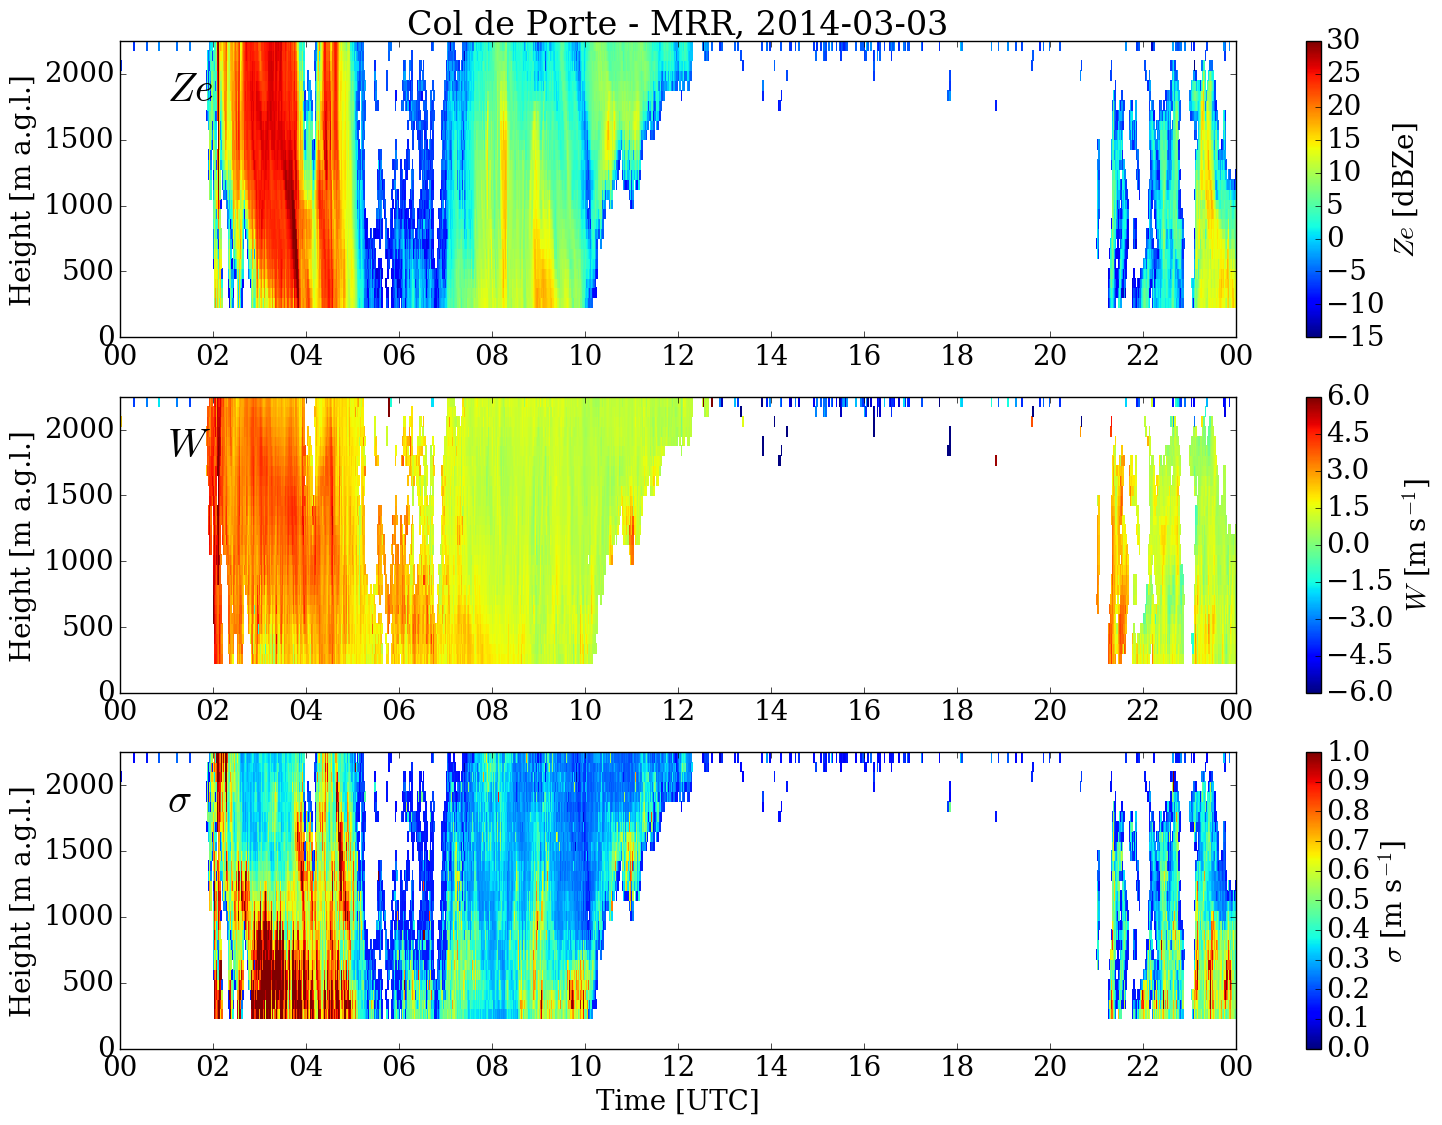

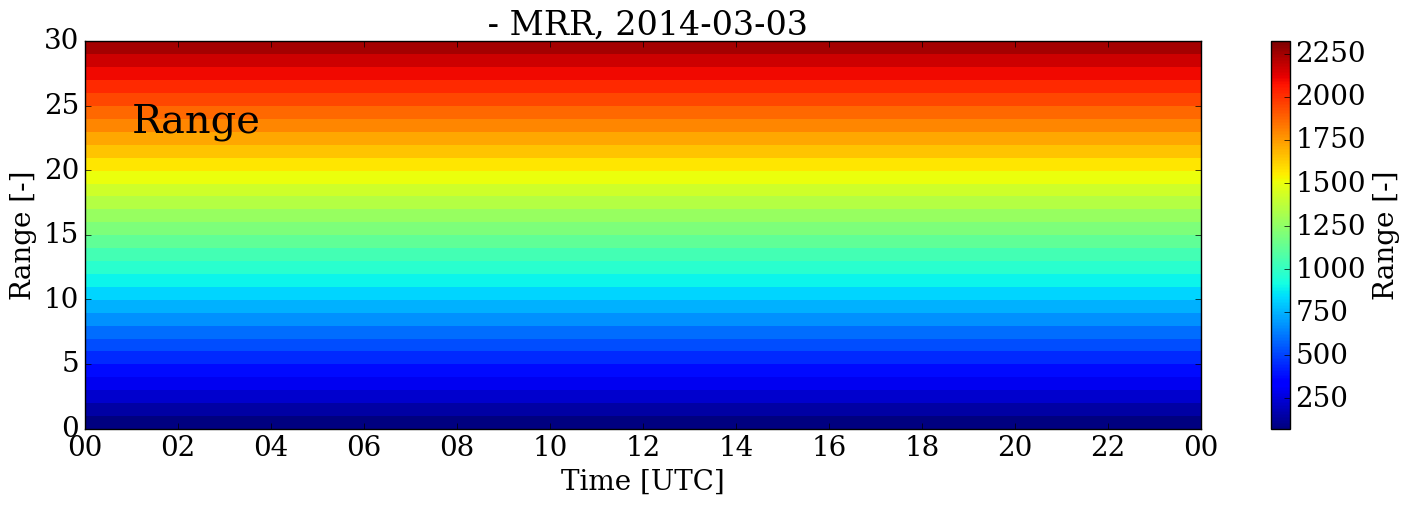

In [4]:
years =  [2014] # e.g.  [2014];  [2014,2015];  range(2014,2016)   
months = [3] # e.g.  [12];  [4,5,6];  range(1,13)   
days  = range(3,4)# e.g.  [1];  [1,2,4];  range(1,5)   

for year in years:
    for month in months:
        for day in days: 
            file_in = path+"MK_processed/"+str(year)+str(month).zfill(2)+"/"+name_station+"_"+str(2014)+str(month).zfill(2)+str(day).zfill(2)+".nc"
            fig_out = path+"Plots/"+str(year)+str(month).zfill(2)+"/"+name_station+"_"+str(year)+str(month).zfill(2)+str(day).zfill(2)
            
            if (os.path.isfile(file_in) == True): #Processes the data only once
                
                if (os.path.isfile(fig_out) == False):
                    
                    if os.path.exists(os.path.dirname(fig_out)) == False: os.mkdir(os.path.dirname(fig_out))

                    MRRQlooks(file_in, fig_out,year, month, day, Ze_ranges = [-15, 30], W_ranges = [-6, 6], SW_ranges = [0, 1], format='png',dpi=300)
                    pylab.show()
                    
                else:
                    print "Figure ready "+str(year)+"/"+str(month).zfill(2)+"/"+str(day).zfill(2)
            else:
                print "NetCDF file not found "+str(year)+"/"+str(month).zfill(2)+"/"+str(day).zfill(2)                    

In [6]:
ospath.join(ospath.expanduser("~"), 'lib/netCDF4/')

'C:\\Users\\duran\\lib/netCDF4/'

'C:\\Users\\duran'